<a href="https://colab.research.google.com/github/NarayaniSuresh/CSE340/blob/main/Implementation_of_Prinicipal_Components_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# 1) Import all the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




In [18]:
# 2) Load the Dataset
data = pd.read_csv('cars-used.csv')



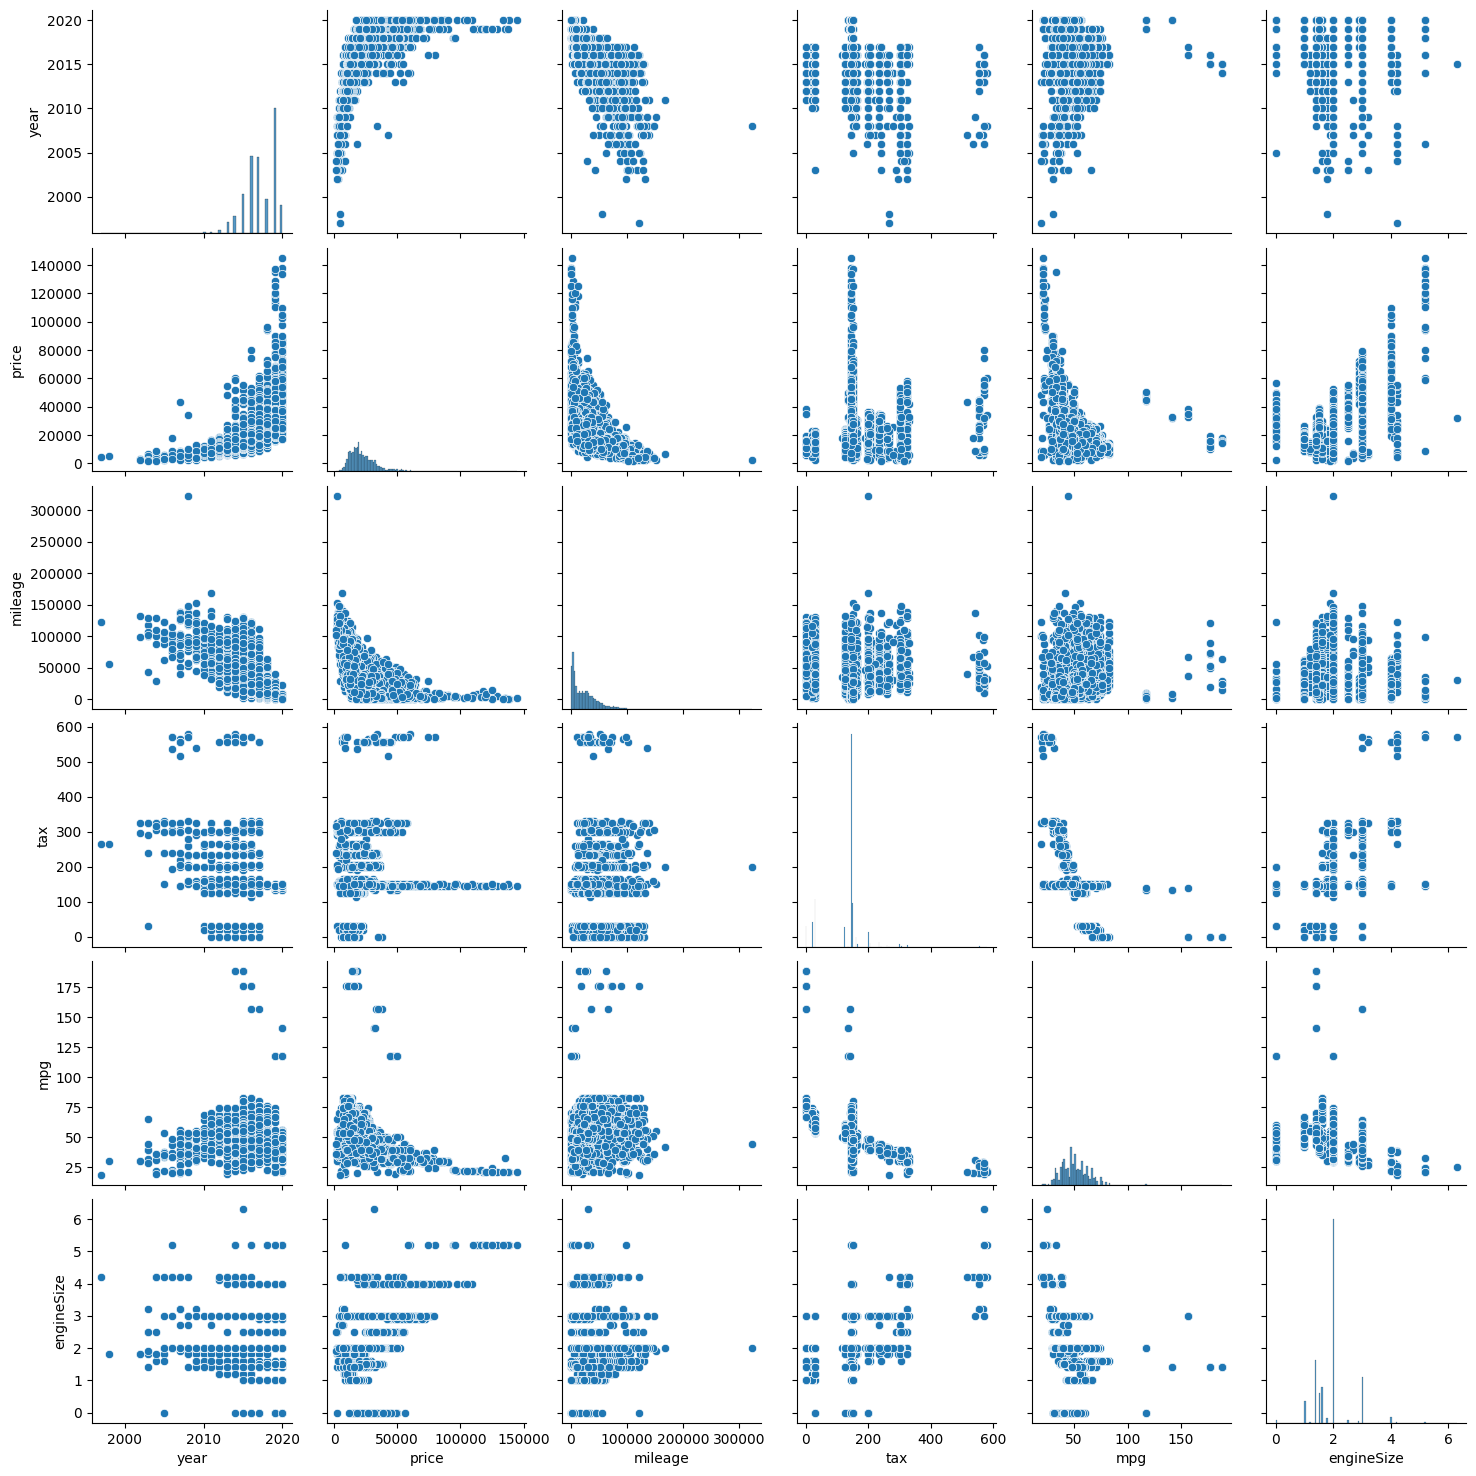

In [19]:
# 3) Plotting continues numerical features
numeric_data = data.select_dtypes(include=[np.number])
sns.pairplot(numeric_data)
plt.show()



In [20]:
# 4) Principal Component Analysis (PCA) object
pca = PCA()



In [21]:
# 5) Principal Component Analysis (PCA) from scratch
def my_pca(data, n_components):
    # Centering the data
    mean = np.mean(data, axis=0)
    centered_data = data - mean

    # Computing covariance matrix
    cov_matrix = np.cov(centered_data, rowvar=False)

    # Eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sorting eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Selecting top n_components eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Projecting the data onto the selected eigenvectors
    projected_data = np.dot(centered_data, selected_eigenvectors)

    return projected_data, selected_eigenvectors, sorted_eigenvalues



In [22]:
#  Preprocessing Steps
# Handle missing values
data.dropna(inplace=True)

# Scale numerical features
scaler = StandardScaler()
numeric_data = data.select_dtypes(include=[np.number])
scaled_data = scaler.fit_transform(numeric_data)



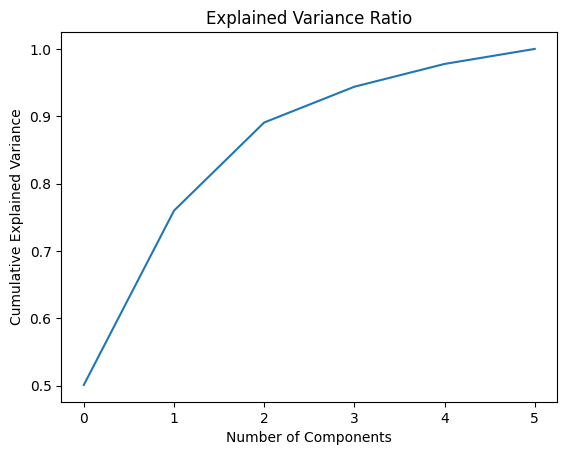

In [32]:
# 6) Plotting explained variance ratio
pca_data, eigenvectors, eigenvalues = my_pca(scaled_data, n_components=len(numeric_data.columns))
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()




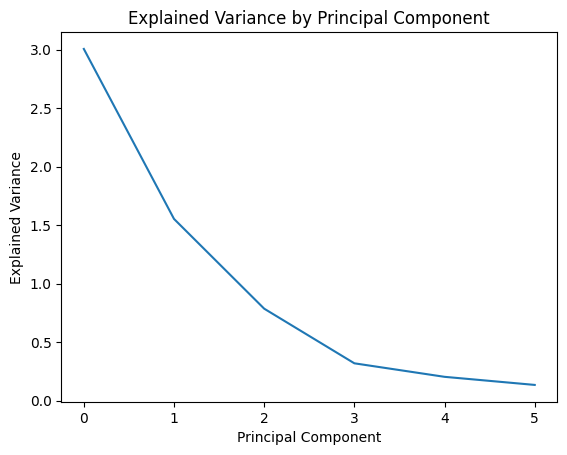

In [33]:
# 7) Plotting explained variance
plt.plot(eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()



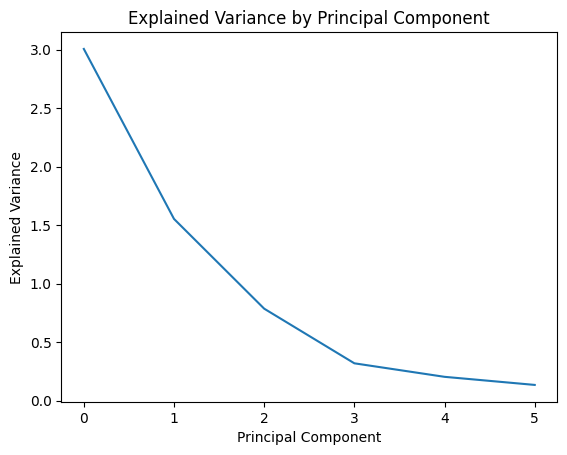

In [25]:
# 8) Plotting explained variance
plt.plot(eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()



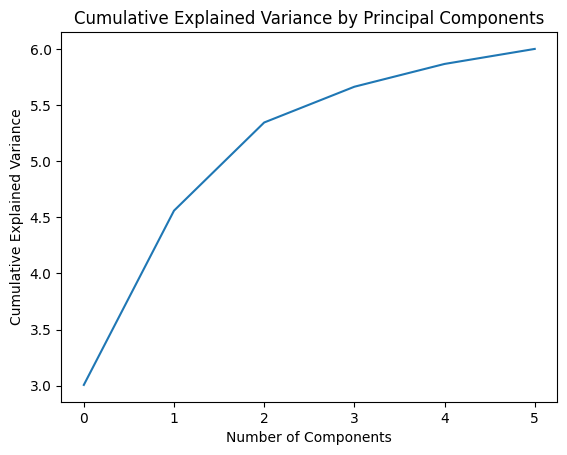

In [26]:
# 9) Plotting Cumulative explained variance
plt.plot(np.cumsum(eigenvalues))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()



In [29]:
# 10) Covariance matrix of Principal components
pc_cov_matrix = np.cov(eigenvectors)

In [30]:


# 11) Interpretation of Principal Components
# Each principal component represents a linear combination of the original features.
# Higher absolute values of the loadings indicate a stronger contribution of that original feature to the principal component.
for i in range(len(eigenvectors)):
    print(f"Principal Component {i+1} loadings:")
    for j, feature in enumerate(numeric_data.columns):
        print(f"{feature}: {eigenvectors[j, i]}")
    print()



Principal Component 1 loadings:
year: -0.4028254316677713
price: -0.5101661081228536
mileage: 0.40477730449713856
tax: -0.34511511081849106
mpg: 0.4637267858808149
engineSize: -0.28190526037992814

Principal Component 2 loadings:
year: -0.5044382412233551
price: 0.03785254959172496
mileage: 0.4935922936845078
tax: 0.40349441523663804
mpg: -0.19415188789374346
engineSize: 0.5476980867195901

Principal Component 3 loadings:
year: -0.10088103317515701
price: -0.4190124750292636
mileage: -0.08336572399030243
tax: 0.5956974875516156
mpg: -0.3728469975071465
engineSize: -0.5598493893481845

Principal Component 4 loadings:
year: 0.14775079543836991
price: -0.08955372419940824
mileage: -0.21387208901536928
tax: 0.5718564276155781
mpg: 0.7516187478462523
engineSize: 0.18016116826421955

Principal Component 5 loadings:
year: 0.6399583083567947
price: 0.09767210056304275
mileage: 0.7298473194434565
tax: 0.13908837264856452
mpg: 0.027880773234135795
engineSize: -0.16767081354772048

Principal Comp

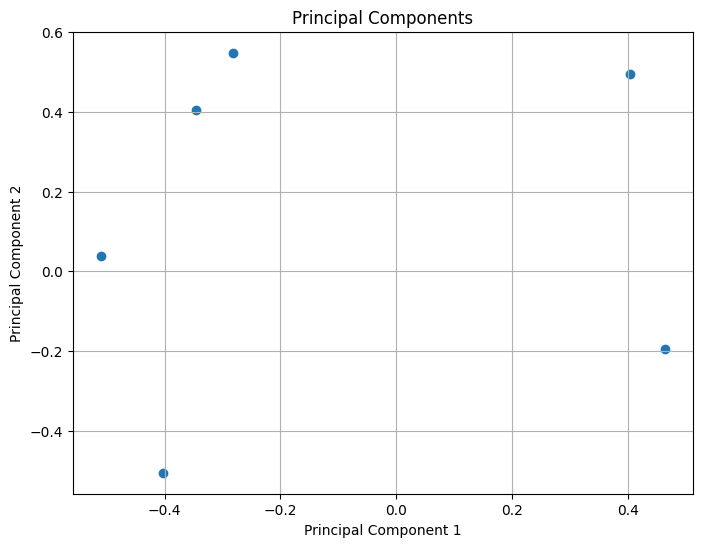

In [31]:
# 12) Visualize the principal components
pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components')
plt.grid(True)
plt.show()
